<a href="https://colab.research.google.com/github/Gameto2025/Segundo_Desafio_TelecomX/blob/main/Segundo_Desafio_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SEGUNDO DESAFIO TELECOM X**

La empresa Telecom X quiere anticiparse al problema de la cancelación, y nos ha pedido  desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

## **Extraccion y Visualizacion de los datos**

In [5]:
import warnings

warnings.filterwarnings('ignore')


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
datos= pd.read_csv('/content/df.csv')
datos

,Abandono_cliente,Genero,Cliente_senior,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas_telefonicas,Servicio_internet,Seguridad_en_línea_Internet,...,Proteccion_de_dispositivos_Internet,Soporte_tecnico_Internet,Streaming_TV_Internet,Streaming_peliculas_Internet,Tipo_de_contrato,Facturacion_on_line,Metodo_de_pago,Cargo_mensual,Cargo_total,Cuentas_diarias
0,0,0,0,1,1,9,1,0,1,0,...,0,1,1,0,1,1,0,65.60,593.30,2.155059
1,0,1,0,0,0,9,1,1,1,0,...,0,0,0,1,0,0,0,59.90,542.40,1.967806
2,1,1,0,0,0,4,1,0,2,0,...,1,0,0,0,0,1,1,73.90,280.85,2.427727
3,1,1,1,1,0,13,1,0,2,0,...,1,0,1,1,0,1,1,98.00,1237.85,3.219448
4,1,0,1,1,0,3,1,0,2,0,...,0,1,1,0,0,1,0,83.90,267.40,2.756242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,0,13,1,0,1,1,...,0,1,0,0,1,0,0,55.15,742.90,1.811761
7263,1,1,0,1,0,22,1,1,2,0,...,0,0,0,1,0,1,1,85.10,1873.70,2.795664
7264,0,1,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,0,50.30,92.75,1.652431
7265,0,1,0,1,1,67,1,0,1,1,...,1,1,0,1,2,0,0,67.85,4627.65,2.228975


## **Calculo de Clases**

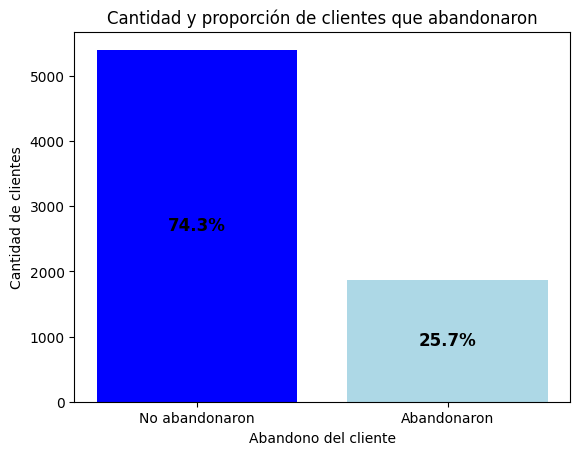

In [8]:

churn_counts = datos['Abandono_cliente'].value_counts()
churn_percentages = datos['Abandono_cliente'].value_counts(normalize=True) * 100

labels = ['No abandonaron', 'Abandonaron']
counts = [churn_counts.get(0, 0), churn_counts.get(1, 0)]
percentages = [churn_percentages.get(0, 0), churn_percentages.get(1, 0)]

fig, ax = plt.subplots()
bars = ax.bar(labels, counts, color=['blue', 'lightblue'])
for bar, percent in zip(bars, percentages):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f'{percent:.1f}%',
        ha='center', va='center', color='black', fontsize=12, fontweight='bold'
    )
ax.set_title('Cantidad y proporción de clientes que abandonaron')
ax.set_ylabel('Cantidad de clientes')
ax.set_xlabel('Abandono del cliente')

plt.show()

En este dataframe existe un desbalance de clases.

## **PREPARACION DE LOS DATOS PARA EL MODELADO**


#### **APLICANDO FEATURE ENGINEERING**


### Creando variables

In [9]:
datos['Gasto_diario_antiguedad'] = datos['Cuentas_diarias'] / (datos['Antiguedad_meses'] + 1)

Se crearon las nuevas variables:

**Gasto_mensual_antiguedad** que refleja el gsto del cliente segun la antiguedad que tiene.

### **Removiendo columnas**

### Usando  mutual_info_classif (Información Mutua) para determinar las columnas a eliminar

In [10]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

X = datos.drop(columns=['Abandono_cliente'])
y = datos['Abandono_cliente']

importancias = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

mi_scores = pd.DataFrame({'Variable': X.columns, 'Importancia_MI': importancias})
mi_scores = mi_scores.sort_values(by='Importancia_MI', ascending=False)
print(mi_scores)

                               Variable  Importancia_MI
20              Gasto_diario_antiguedad        0.124872
14                     Tipo_de_contrato        0.104031
8           Seguridad_en_línea_Internet        0.066557
4                      Antiguedad_meses        0.064984
11             Soporte_tecnico_Internet        0.063813
7                     Servicio_internet        0.051892
9            Respaldo_en_línea_Internet        0.048942
16                       Metodo_de_pago        0.048456
17                        Cargo_mensual        0.045997
19                      Cuentas_diarias        0.045823
10  Proteccion_de_dispositivos_Internet        0.040093
18                          Cargo_total        0.039670
12                Streaming_TV_Internet        0.038656
13         Streaming_peliculas_Internet        0.032556
15                  Facturacion_on_line        0.022310
1                        Cliente_senior        0.012867
2                          Tiene_pareja        0

Se eliminaran las variables que tengan menor indice MI, ya son las que menos aportan en el analisis del churn.

In [11]:
datos_reducido = datos.drop(columns=['Cargo_mensual','Cuentas_diarias','Genero','Cliente_senior','Tiene_pareja','Tiene_dependientes','Servicio_telefonico','Multiples_lineas_telefonicas','Servicio_internet','Soporte_tecnico_Internet','Proteccion_de_dispositivos_Internet','Streaming_peliculas_Internet','Facturacion_on_line','Cargo_total','Respaldo_en_línea_Internet','Streaming_TV_Internet'])
datos_reducido.sample(10)

,Abandono_cliente,Antiguedad_meses,Seguridad_en_línea_Internet,Tipo_de_contrato,Metodo_de_pago,Gasto_diario_antiguedad
6978,1,65,0,0,3,0.045718
2271,0,38,0,0,1,0.085203
3905,0,37,1,2,2,0.053124
1648,0,2,2,0,0,0.222295
4400,0,72,2,2,3,0.011341
6583,0,64,1,1,0,0.033256
5519,0,72,1,2,3,0.035574
5867,0,22,2,1,0,0.027995
3398,0,29,2,1,1,0.021901
5905,1,10,0,0,1,0.223241


### **Verificando Correlacion entre variables**

In [12]:
datos_reducido.corr().round(4)

,Abandono_cliente,Antiguedad_meses,Seguridad_en_línea_Internet,Tipo_de_contrato,Metodo_de_pago,Gasto_diario_antiguedad
Abandono_cliente,1.0000,-0.3441,-0.3263,-0.3874,-0.1039,0.4041
Antiguedad_meses,-0.3441,1.0000,0.1471,0.6722,0.3693,-0.5973
Seguridad_en_línea_Internet,-0.3263,0.1471,1.0000,0.3908,-0.0452,-0.3114
Tipo_de_contrato,-0.3874,0.6722,0.3908,1.0000,0.2282,-0.4010
Metodo_de_pago,-0.1039,0.3693,-0.0452,0.2282,1.0000,-0.2055
Gasto_diario_antiguedad,0.4041,-0.5973,-0.3114,-0.4010,-0.2055,1.0000


Todas las variables elegidas tiene una correlacion moderada que no representan fuga de datos.


####**Aplicando indice VIF para ver si hay colinealidad entre variables**

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = datos_reducido.drop(columns=['Abandono_cliente'])
X_const = add_constant(X_vif)

vif = pd.DataFrame()
vif["Variable"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

                      Variable       VIF
0                        const  9.150343
1             Antiguedad_meses  2.768366
2  Seguridad_en_línea_Internet  1.356948
3             Tipo_de_contrato  2.205839
4               Metodo_de_pago  1.172130
5      Gasto_diario_antiguedad  1.717607


Si el valor es menor a 5 no hay problemas de multicolinealidad. En consecuncia, las variables elegidas no tienen multicolinealidad.

#### **Verificando fuga de datos con Correlacion Pearson**

In [14]:
corr_target = datos_reducido.corr()['Abandono_cliente'].sort_values(ascending=False)
print(corr_target)

Abandono_cliente               1.000000
Gasto_diario_antiguedad        0.404094
Metodo_de_pago                -0.103922
Seguridad_en_línea_Internet   -0.326288
Antiguedad_meses              -0.344079
Tipo_de_contrato              -0.387433
Name: Abandono_cliente, dtype: float64


En general, ninguna variable tiene alta correlacion (sobre 0.5) con la variable en estudio. Por lo tanto, se podria concluir que no hay fuga de datos.

## **Dataframe datos_reducido para el modelado**

In [15]:
datos_reducido.sample(5)

,Abandono_cliente,Antiguedad_meses,Seguridad_en_línea_Internet,Tipo_de_contrato,Metodo_de_pago,Gasto_diario_antiguedad
6684,0,42,1,2,2,0.064442
6776,0,42,1,0,2,0.050729
6193,0,42,0,0,1,0.042516
3452,1,46,0,1,3,0.041868
1894,0,49,0,2,3,0.043463


In [16]:
datos_reducido.to_csv("datos.csv", index=False)



## **CREANDO BASELINE CON MODELO DUMMY**


In [17]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

X = datos_reducido.drop(['Abandono_cliente'],axis=1)
y = datos_reducido['Abandono_cliente']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

baseline = DummyRegressor()
baseline.fit(X_train,y_train)

dummy = DummyClassifier()
dummy.fit(X_train, y_train),
dummy.score(X_test, y_test)

0.756075194864741

Para los modelos predictivos se usará Pipeline

###**CREANDO PRIMER MODELO: KNN**

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report,accuracy_score, f1_score, roc_auc_score, roc_curve)

Matriz de confusión:
[[816 264]
 [153 221]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.842     0.756     0.796      1080
           1      0.456     0.591     0.515       374

    accuracy                          0.713      1454
   macro avg      0.649     0.673     0.656      1454
weighted avg      0.743     0.713     0.724      1454

Accuracy: 0.713
F1-score: 0.515
AUC: 0.750


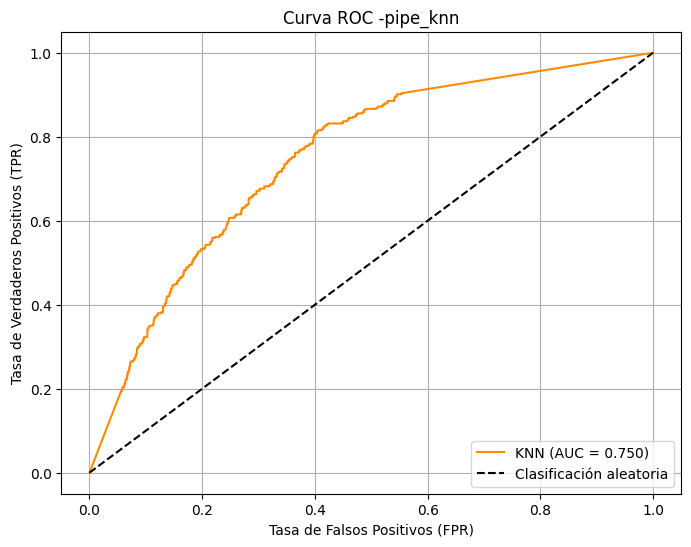

In [19]:
columnas_categoricas = ['Tipo_de_contrato', 'Metodo_de_pago']
columnas_numericas = ['Antiguedad_meses', 'Seguridad_en_línea_Internet', 'Gasto_diario_antiguedad']

X = datos_reducido.drop('Abandono_cliente', axis=1).copy()
y = datos_reducido['Abandono_cliente']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

preprocesador = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first', sparse_output=False), columnas_categoricas),
    ('num', StandardScaler(), columnas_numericas)
])

pipe_knn = ImbPipeline(steps=[
    ('preprocesador', preprocesador),
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=7, weights='distance', p=2))
])

pipe_knn.fit(X_train, y_train)

y_prob = pipe_knn.predict_proba(X_test)[:, 1]
umbral = 0.5
y_pred = (y_prob >= umbral).astype(int)

# 7. Evaluar
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=3))

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_prob):.3f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_score(y_test, y_prob):.3f})', color='darkorange')
plt.plot([0,1], [0,1], 'k--', label='Clasificación aleatoria')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC -pipe_knn')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### **Buscando mejores parametros y umbral**

In [20]:
from sklearn.model_selection import GridSearchCV

pipeline = ImbPipeline(steps=[
    ('preprocesador', preprocesador),
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

mejor_modelo = grid_search.best_estimator_

y_prob = mejor_modelo.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.01)
mejor_umbral = 0.4
mejor_f1 = 0

for umbral in thresholds:
    y_pred_umbral = (y_prob >= umbral).astype(int)
    f1 = f1_score(y_test, y_pred_umbral)
    if f1 > mejor_f1:
        mejor_f1 = f1
        mejor_umbral = umbral

print(f"Mejor umbral para F1-score: {mejor_umbral:.2f} (F1 = {mejor_f1:.3f})")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores hiperparámetros: {'knn__n_neighbors': 9, 'knn__p': 2, 'knn__weights': 'uniform'}
Mejor umbral para F1-score: 0.34 (F1 = 0.585)


MEJORANDO EL MODELO

Evaluación del modelo con pipeline y umbral personalizado
Matriz de confusión:
[[735 345]
 [119 255]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.861     0.681     0.760      1080
           1      0.425     0.682     0.524       374

    accuracy                          0.681      1454
   macro avg      0.643     0.681     0.642      1454
weighted avg      0.749     0.681     0.699      1454

Accuracy:  0.681
F1-score:  0.524
AUC:       0.750


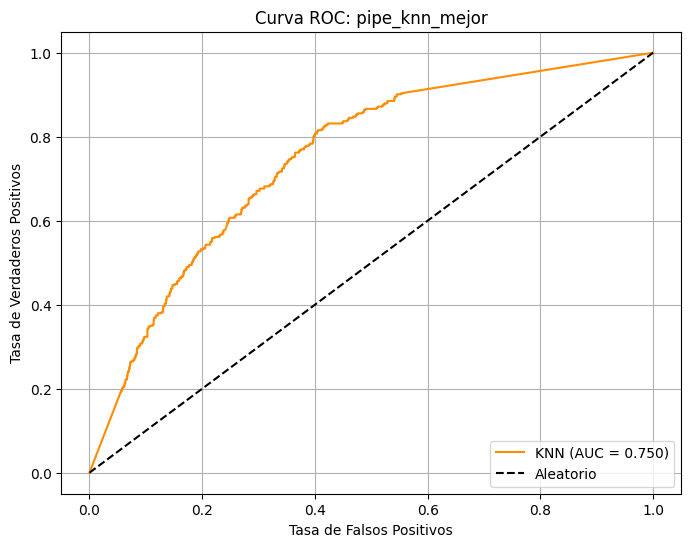

In [21]:
from imblearn.pipeline import make_pipeline

pipe_knn_mejor = make_pipeline(
    preprocesador,
    SMOTE(random_state=42),
    KNeighborsClassifier(
        n_neighbors=9,
        weights='uniform',
        p=2
    )
)

pipe_knn_mejor.fit(X_train, y_train)
y_prob = pipe_knn.predict_proba(X_test)[:, 1]
mejor_umbral = 0.34
y_pred = (y_prob >= mejor_umbral).astype(int)

print("Evaluación del modelo con pipeline y umbral personalizado")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=3))
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"F1-score:  {f1_score(y_test, y_pred):.3f}")
print(f"AUC:       {roc_auc_score(y_test, y_prob):.3f}")
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_score(y_test, y_prob):.3f})', color='darkorange')
plt.plot([0,1], [0,1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC: pipe_knn_mejor')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Modificando Scoring de F1 a Recall

In [22]:
pipe_knn_opt = make_pipeline(
    preprocesador,
    SMOTE(random_state=42),
    KNeighborsClassifier()
)

param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 2]
}

grid_search = GridSearchCV(
    estimator=pipe_knn_opt,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

mejor_modelo = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)


y_prob = mejor_modelo.predict_proba(X_test)[:, 1]
thresholds = np.arange(0.1, 0.9, 0.01)
mejor_umbral = 0.5
mejor_f1 = 0

for umbral in thresholds:
    y_pred_umbral = (y_prob >= umbral).astype(int)
    f1 = f1_score(y_test, y_pred_umbral)
    if f1 > mejor_f1:
        mejor_f1 = f1
        mejor_umbral = umbral

print(f"Mejor umbral para F1: {mejor_umbral:.2f} (F1 = {mejor_f1:.3f})")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores hiperparámetros: {'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'uniform'}
Mejor umbral para F1: 0.34 (F1 = 0.585)


###**Probando el modelo con modificacion del scoring**

 Evaluación del modelo con parámetros y umbral personalizados
Matriz de confusión:
[[591 489]
 [ 34 340]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.946     0.547     0.693      1080
           1      0.410     0.909     0.565       374

    accuracy                          0.640      1454
   macro avg      0.678     0.728     0.629      1454
weighted avg      0.808     0.640     0.660      1454

Accuracy:  0.640
F1-score:  0.565
AUC:       0.802


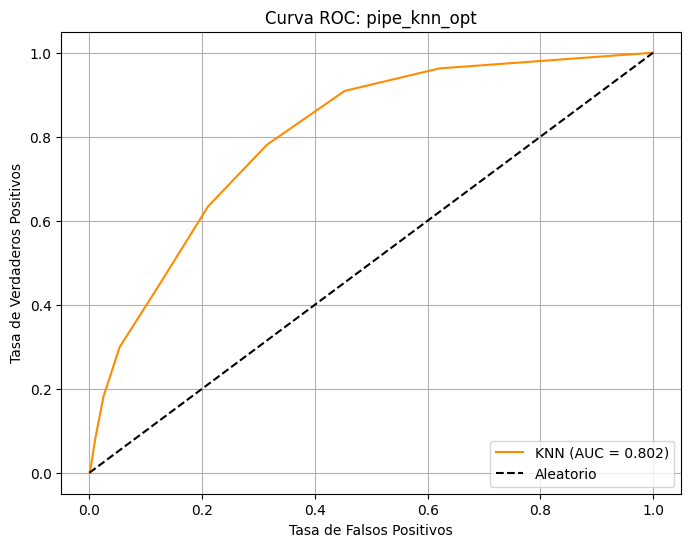

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score

pipe_knn_opt = KNeighborsClassifier(
    n_neighbors=9,
    weights='uniform',
    p=2
)

pipe_knn_opt.fit(X_train, y_train)
y_prob = pipe_knn_opt.predict_proba(X_test)[:, 1]

mejor_umbral = 0.22
y_pred = (y_prob >= mejor_umbral).astype(int)

print(" Evaluación del modelo con parámetros y umbral personalizados")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=3))
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"F1-score:  {f1_score(y_test, y_pred):.3f}")
print(f"AUC:       {roc_auc_score(y_test, y_prob):.3f}")
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_score(y_test, y_prob):.3f})', color='darkorange')
plt.plot([0,1], [0,1], 'k--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC: pipe_knn_opt')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### COMPARANDO MODELOS KNN

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluar_modelo(modelo, X_test, y_test, umbral=0.5):
    y_prob = modelo.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= umbral).astype(int)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Clase 1)': precision_score(y_test, y_pred, zero_division=0),
        'Recall (Clase 1)': recall_score(y_test, y_pred),
        'F1-score (Clase 1)': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    }
modelos = [
    ('KNN 1', pipe_knn, 0.5),
    ('KNN 2', pipe_knn_mejor, 0.34),
    ('KNN 3', pipe_knn_opt, 0.22),
]
resultados = []
for nombre, modelo, umbral in modelos:
    metrica = evaluar_modelo(modelo, X_test, y_test, umbral=umbral)
    metrica['Modelo'] = nombre
    metrica['Umbral'] = umbral
    resultados.append(metrica)

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados[['Modelo', 'Umbral', 'Accuracy', 'Precision (Clase 1)', 'Recall (Clase 1)', 'F1-score (Clase 1)', 'AUC']]

print(df_resultados)

  Modelo  Umbral  Accuracy  Precision (Clase 1)  Recall (Clase 1)  \
0  KNN 1    0.50  0.713205             0.455670          0.590909   
1  KNN 2    0.34  0.702889             0.456587          0.815508   
2  KNN 3    0.22  0.640303             0.410133          0.909091   

   F1-score (Clase 1)       AUC  
0            0.514552  0.749871  
1            0.585413  0.801416  
2            0.565254  0.802010  


KNN 3 es el modelo que mejor detecta a los clientes que realmente van a abandonar (Recall = 0.815) sin perder mucha precisión (0.43).

KNN 2 también está bastante bien, con buen recall(0.80)y  precision de 0.41.

KNN 1 tiene menor recall (0.68)y mejor precision (0.43).

### **SEGUNDO MODELO:  DECISION TREE CLASSIFIER**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (confusion_matrix, classification_report,accuracy_score, f1_score, roc_auc_score)
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

Matriz de confusión:
[[748 332]
 [ 82 292]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0      0.901     0.693     0.783      1080
           1      0.468     0.781     0.585       374

    accuracy                          0.715      1454
   macro avg      0.685     0.737     0.684      1454
weighted avg      0.790     0.715     0.732      1454

Accuracy: 0.715
F1-score: 0.585
AUC: 0.812


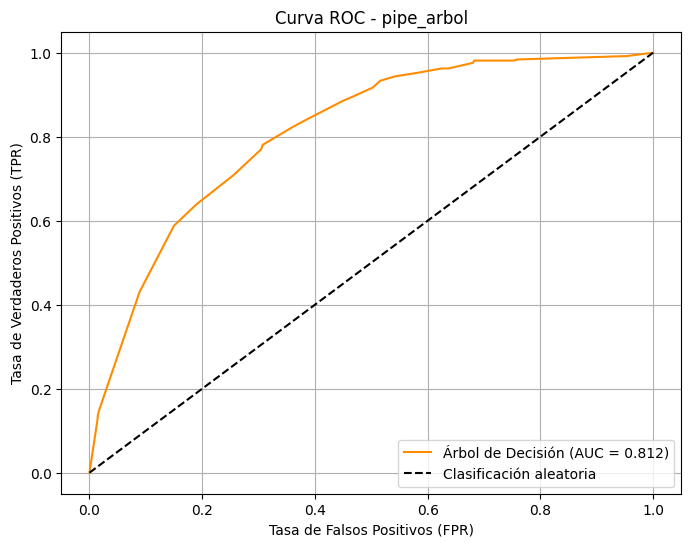

In [26]:
X = datos_reducido.drop('Abandono_cliente', axis=1).copy()
y = datos_reducido['Abandono_cliente']

columnas_categoricas = ['Tipo_de_contrato', 'Metodo_de_pago']
columnas_numericas = ['Antiguedad_meses', 'Seguridad_en_línea_Internet', 'Gasto_diario_antiguedad']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
preprocesador = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first', sparse_output=False), columnas_categoricas),
    ('num', StandardScaler(), columnas_numericas)
])
pipe_arbol = make_pipeline(
    preprocesador,
    SMOTE(random_state=42),
    DecisionTreeClassifier(
        max_depth=5,
        min_samples_split=10,
        random_state=42
    )
)

pipe_arbol.fit(X_train, y_train)
y_prob = pipe_arbol.predict_proba(X_test)[:, 1]
umbral = 0.5
y_pred = (y_prob >= umbral).astype(int)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=3))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred):.3f}")
print(f"AUC: {roc_auc_score(y_test, y_prob):.3f}")
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Árbol de Decisión (AUC = {roc_auc_score(y_test, y_prob):.3f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificación aleatoria')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - pipe_arbol')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**AJUSTANDO HIPERPARAMETROS**

In [27]:
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(
    preprocesador,
    SMOTE(random_state=42),
    DecisionTreeClassifier(random_state=42)
)

param_grid = {
    'decisiontreeclassifier__max_depth': [3, 5, 10, None],
    'decisiontreeclassifier__min_samples_split': [2, 10, 20],
    'decisiontreeclassifier__min_samples_leaf': [1, 5, 10]
}

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Mejor AUC:", grid.best_score_)
print("Mejores parámetros:", grid.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejor AUC: 0.5884403005074723
Mejores parámetros: {'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 10, 'decisiontreeclassifier__min_samples_split': 2}


**NUEVO MODELO CON MEJORADO CON HIPERPARAMETROS AJUSTADOS**

Exactitud: 0.6368638239339752
              precision    recall  f1-score   support

           0       0.93      0.55      0.69      1080
           1       0.41      0.89      0.56       374

    accuracy                           0.64      1454
   macro avg       0.67      0.72      0.62      1454
weighted avg       0.80      0.64      0.66      1454



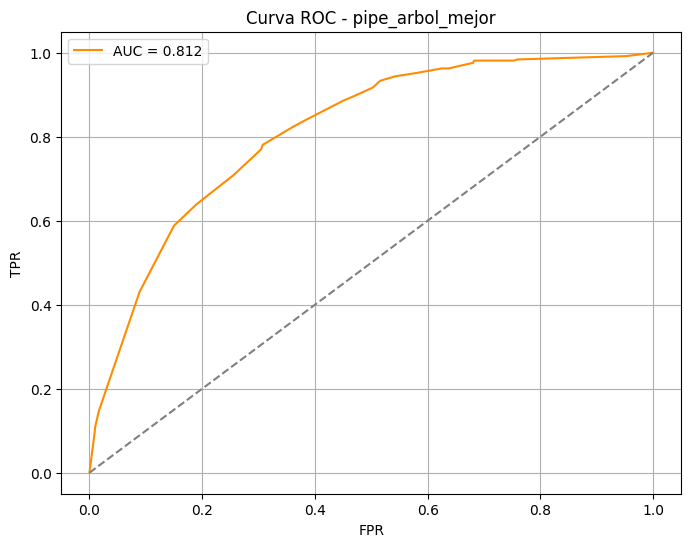

In [28]:
pipe_arbol_mejor = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=10,
    random_state=42
)

pipe_arbol_mejor = ImbPipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('smote', SMOTE(random_state=42)),
    ('clf', pipe_arbol_mejor)
])

pipe_arbol_mejor.fit(X_train, y_train)

y_prob_opt = pipe_arbol_mejor.predict_proba(X_test)[:, 1]

umbral = 0.34
y_pred_umbral = (y_prob_opt >= umbral).astype(int)

print("Exactitud:", accuracy_score(y_test, y_pred_umbral))
print(classification_report(y_test, y_pred_umbral))
fpr, tpr, _ = roc_curve(y_test, y_prob_opt)
roc_auc = roc_auc_score(y_test, y_prob_opt)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC - pipe_arbol_mejor')
plt.legend()
plt.grid(True)
plt.show()

**BUSCANDO MEJORES PARAMETROS CON RandomizedSearchCV**

In [29]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

pipe_dtree = ImbPipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('smote', SMOTE(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=42))
])

param_dist = {
    'clf__max_depth': [3, 5, 10, None],
    'clf__min_samples_split': randint(2, 20),
    'clf__min_samples_leaf': randint(1, 10),
    'clf__criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(
    estimator=pipe_dtree,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='recall',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor score (CV):", random_search.best_score_)

Mejores hiperparámetros: {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 15}
Mejor score (CV): 0.8127090301003344


**MODELO OPTIMIZADO CON RECALL AJUSTADO**

Matriz de confusión (umbral personalizado):
[[453 627]
 [ 18 356]]

Reporte de clasificación (umbral personalizado):
              precision    recall  f1-score   support

           0       0.96      0.42      0.58      1080
           1       0.36      0.95      0.52       374

    accuracy                           0.56      1454
   macro avg       0.66      0.69      0.55      1454
weighted avg       0.81      0.56      0.57      1454


Exactitud (accuracy): 0.5563961485557084
AUC: 0.812


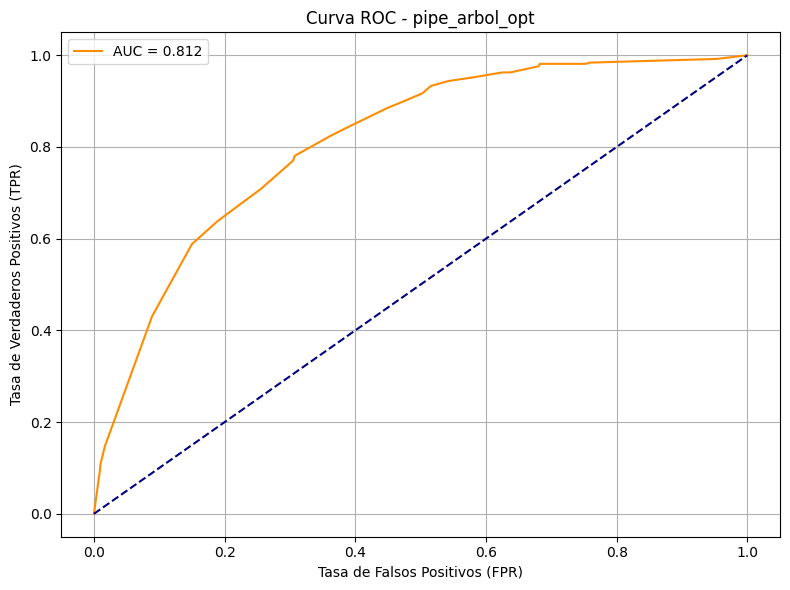

In [30]:
dtree_opt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=15,
    random_state=42
)

pipe_arbol_opt = ImbPipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('smote', SMOTE(random_state=42)),
    ('clf', dtree_opt)
])

pipe_arbol_opt.fit(X_train, y_train)
y_prob_opt = pipe_arbol_opt.predict_proba(X_test)[:, 1]
umbral = 0.22
y_pred_umbral = (y_prob_opt >= umbral).astype(int)

print("Matriz de confusión (umbral personalizado):")
print(confusion_matrix(y_test, y_pred_umbral))
print("\nReporte de clasificación (umbral personalizado):")
print(classification_report(y_test, y_pred_umbral))
print("\nExactitud (accuracy):", accuracy_score(y_test, y_pred_umbral))
print(f"AUC: {roc_auc_score(y_test, y_prob_opt):.3f}")
fpr, tpr, _ = roc_curve(y_test, y_prob_opt)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob_opt):.3f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - pipe_arbol_opt')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Alta sensibilidad para detectar abandono (Recall = 0.95): El modelo detecta correctamente el 95% de los clientes que realmente abandonaron

El modelo es bueno detectando a los clientes que abandonan, aunque a costa de equivocarse con bastantes que no lo harían (muchos falsos positivos). Esto puede estar bien si tu objetivo es intervenir proactivamente para retener a potenciales desertores, ya que es preferible actuar con una falsa alarma que perder un cliente real.

**COMPARANDO MODELOS DECISION TREE**

In [31]:
def evaluar_modelo(modelo, X_test, y_test, umbral=0.5):

    y_prob = modelo.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= umbral).astype(int)

    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Clase 1)': precision_score(y_test, y_pred, zero_division=0),
        'Recall (Clase 1)': recall_score(y_test, y_pred),
        'F1-score (Clase 1)': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    }

modelos = [
    ('DT 1', pipe_arbol, 0.5),
    ('DT 2', pipe_arbol_mejor, 0.34),
    ('DT 3', pipe_arbol_opt, 0.22),
]

resultados = []
for nombre, modelo, umbral in modelos:
    metrica = evaluar_modelo(modelo, X_test, y_test, umbral=umbral)  # pasar X_test sin procesar
    metrica['Modelo'] = nombre
    metrica['Umbral'] = umbral
    resultados.append(metrica)

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados[['Modelo', 'Umbral', 'Accuracy', 'Precision (Clase 1)', 'Recall (Clase 1)', 'F1-score (Clase 1)', 'AUC']]
print(df_resultados)

  Modelo  Umbral  Accuracy  Precision (Clase 1)  Recall (Clase 1)  \
0   DT 1    0.50  0.715268             0.467949          0.780749   
1   DT 2    0.34  0.636864             0.405637          0.885027   
2   DT 3    0.22  0.556396             0.362157          0.951872   

   F1-score (Clase 1)       AUC  
0            0.585170  0.811952  
1            0.556303  0.812088  
2            0.524687  0.812088  


El mejor modelo es el numero 3 , con un recall de 0.95 para la clase 1 y una precision de 0.36. El AUC es de 0.812.

## **TERCER MODELO: RANDOM FOREST CLASSIFIER**

In [32]:
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,roc_curve)
import matplotlib.pyplot as plt

Matriz de confusión:
[[837 243]
 [173 201]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1080
           1       0.45      0.54      0.49       374

    accuracy                           0.71      1454
   macro avg       0.64      0.66      0.65      1454
weighted avg       0.73      0.71      0.72      1454

AUC: 0.765


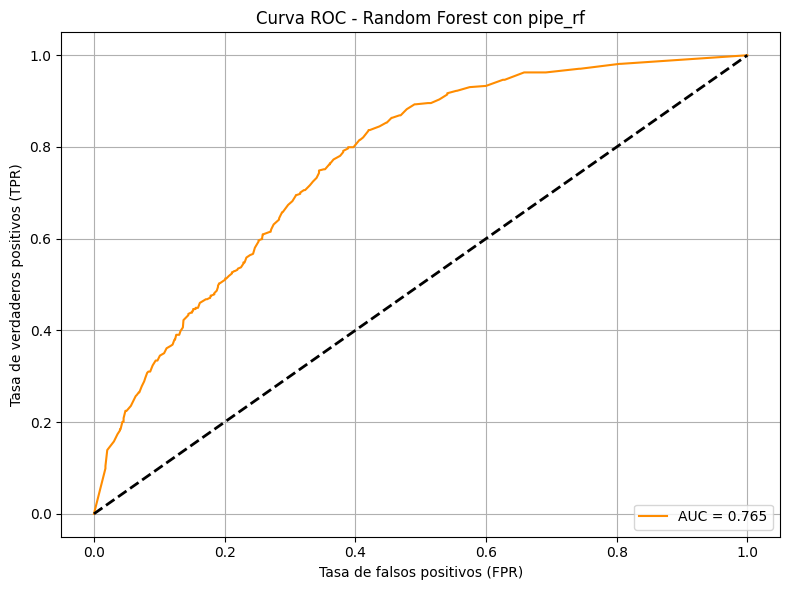

In [33]:

X = datos_reducido.drop('Abandono_cliente', axis=1)
y = datos_reducido['Abandono_cliente']

columnas_categoricas = ['Tipo_de_contrato', 'Metodo_de_pago']
columnas_numericas = ['Antiguedad_meses', 'Seguridad_en_línea_Internet', 'Gasto_diario_antiguedad']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

preprocesador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), columnas_numericas),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), columnas_categoricas)
])

pipe_rf = Pipeline(steps=[
    ('preprocesador', preprocesador),
    ('smote', SMOTE(random_state=42)),
    ('clasificador', RandomForestClassifier(random_state=42))
])

pipe_rf.fit(X_train, y_train)

y_prob = pipe_rf.predict_proba(X_test)[:, 1]
umbral = 0.5
y_pred = (y_prob >= umbral).astype(int)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
print(f"AUC: {roc_auc_score(y_test, y_prob):.3f}")
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.3f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('Curva ROC - Random Forest con pipe_rf')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

**BUSCANDO MEJORES HIPERPARAMETROS AL MODELO RANDOM FOREST**

In [34]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('clasificador', RandomForestClassifier(random_state=42, n_jobs=-1))
])

param_grid = {
    'clasificador__n_estimators': [100, 200],
    'clasificador__max_depth': [7, 10],
    'clasificador__min_samples_split': [2, 5],
    'clasificador__min_samples_leaf': [1, 2],
    'clasificador__max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
mejor_modelo = grid_search.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Mejores hiperparámetros encontrados:
{'clasificador__max_depth': 7, 'clasificador__max_features': 'sqrt', 'clasificador__min_samples_leaf': 1, 'clasificador__min_samples_split': 5, 'clasificador__n_estimators': 200}


**NUEVO MODELO CON AJUSTE DE PARAMETROS  Y DE UMBRAL**

Matriz de confusión (validación cruzada):
[[3102 2296]
 [ 207 1662]]

Reporte de clasificación (validación cruzada):
              precision    recall  f1-score   support

           0       0.94      0.57      0.71      5398
           1       0.42      0.89      0.57      1869

    accuracy                           0.66      7267
   macro avg       0.68      0.73      0.64      7267
weighted avg       0.80      0.66      0.68      7267


Exactitud (accuracy): 0.656
AUC (validación cruzada): 0.832


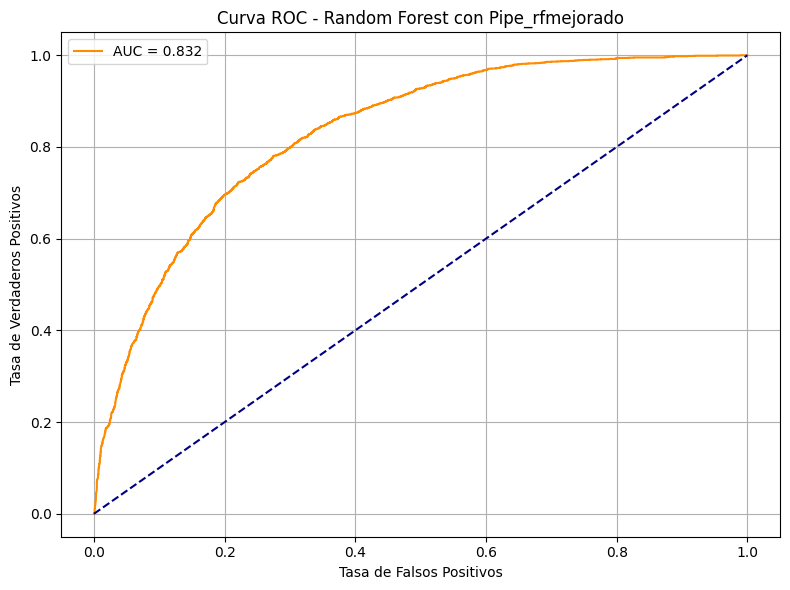

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

mejores_params = {
    'n_estimators': 200,
    'max_depth': 7,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}

pipe_rfmejorado = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clasificador', RandomForestClassifier(random_state=42, n_jobs=-1, **mejores_params))
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_prob_cv = cross_val_predict(
    pipe_rfmejorado,
    X,
    y,
    cv=skf,
    method='predict_proba',
    n_jobs=-1
)[:, 1]

umbral = 0.34
y_pred_cv = (y_prob_cv >= umbral).astype(int)

print("Matriz de confusión (validación cruzada):")
print(confusion_matrix(y, y_pred_cv))
print("\nReporte de clasificación (validación cruzada):")
print(classification_report(y, y_pred_cv))

accuracy_cv = accuracy_score(y, y_pred_cv)
auc_cv = roc_auc_score(y, y_prob_cv)

print(f"\nExactitud (accuracy): {accuracy_cv:.3f}")
print(f"AUC (validación cruzada): {auc_cv:.3f}")
fpr, tpr, thresholds = roc_curve(y, y_prob_cv)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_cv:.3f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.title('Curva ROC - Random Forest con Pipe_rfmejorado')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**AJUSTANDO PARAMETROS Y UMBRAL**

In [36]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('clasificador', RandomForestClassifier(random_state=42, n_jobs=-1))
])

param_grid = {
    'clasificador__n_estimators': [100, 200],
    'clasificador__max_depth': [7, 10],
    'clasificador__min_samples_split': [2, 5],
    'clasificador__min_samples_leaf': [1, 2],
    'clasificador__max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
mejor_modelo = grid_search.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Mejores hiperparámetros encontrados:
{'clasificador__max_depth': 7, 'clasificador__max_features': 'sqrt', 'clasificador__min_samples_leaf': 1, 'clasificador__min_samples_split': 5, 'clasificador__n_estimators': 100}


**MODELO OPTIMIZADO CON RECALL AJUSTADO Y NUEVO UMBRAL**

 Matriz de confusión (validación cruzada):
[[2452 2946]
 [  96 1773]]

 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.45      0.62      5398
           1       0.38      0.95      0.54      1869

    accuracy                           0.58      7267
   macro avg       0.67      0.70      0.58      7267
weighted avg       0.81      0.58      0.60      7267


 Exactitud (accuracy): 0.581
 AUC (validación cruzada): 0.831


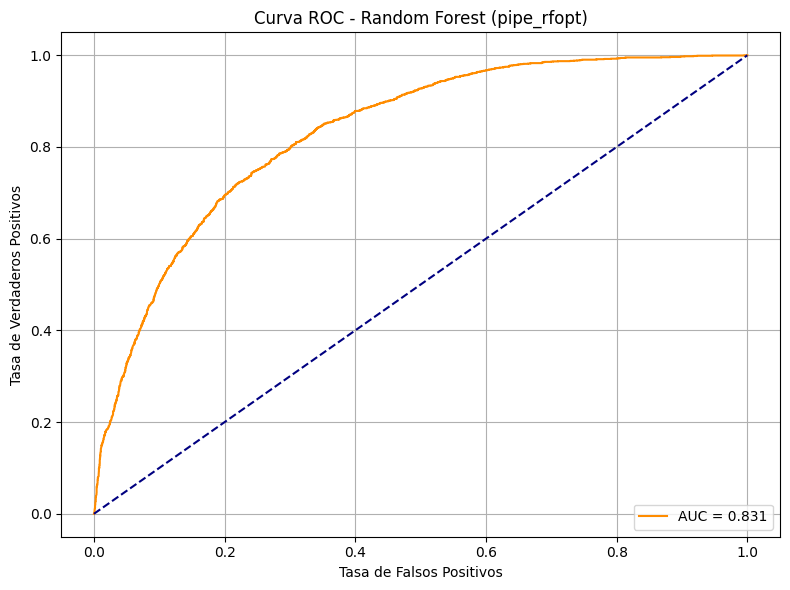


 Entrenando el pipeline final en el conjunto de datos completo...
¡Pipeline final ajustado correctamente!


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, roc_auc_score, roc_curve
)

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline  # versión compatible con SMOTE

mejores_params = {
    'n_estimators': 100,
    'max_depth': 7,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}

pipe_rfopt = make_pipeline(
    StandardScaler(),
    SMOTE(random_state=42),
    RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        **mejores_params
    )
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_prob_cv = cross_val_predict(
    pipe_rfopt,
    X,
    y,
    cv=skf,
    method='predict_proba',
    n_jobs=-1
)[:, 1]

umbral = 0.22
y_pred_cv = (y_prob_cv >= umbral).astype(int)

print(" Matriz de confusión (validación cruzada):")
print(confusion_matrix(y, y_pred_cv))
print("\n Reporte de clasificación:")
print(classification_report(y, y_pred_cv))
accuracy_cv = accuracy_score(y, y_pred_cv)
auc_cv = roc_auc_score(y, y_prob_cv)
print(f"\n Exactitud (accuracy): {accuracy_cv:.3f}")
print(f" AUC (validación cruzada): {auc_cv:.3f}")
fpr, tpr, thresholds = roc_curve(y, y_prob_cv)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {auc_cv:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest (pipe_rfopt)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n Entrenando el pipeline final en el conjunto de datos completo...")
pipe_rfopt.fit(X, y)
print("¡Pipeline final ajustado correctamente!")

## **Comparando Tres modelos de RandomForestClassifier**

In [38]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)
import pandas as pd

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_prob_rf1 = cross_val_predict(pipe_rf, X, y, cv=skf, method='predict_proba', n_jobs=-1)[:, 1]
y_prob_rf2 = cross_val_predict(pipe_rfmejorado, X, y, cv=skf, method='predict_proba', n_jobs=-1)[:, 1]
y_prob_rf3 = cross_val_predict(pipe_rfopt, X, y, cv=skf, method='predict_proba', n_jobs=-1)[:, 1]

def evaluar_con_probabilidades(y_true, y_prob, umbral=0.5):
    y_pred = (y_prob >= umbral).astype(int)
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision (Clase 1)': precision_score(y_true, y_pred, zero_division=0),
        'Recall (Clase 1)': recall_score(y_true, y_pred),
        'F1-score (Clase 1)': f1_score(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_prob)
    }

modelos_prob = [
    ('RF 1', y_prob_rf1, 0.5),
    ('RF 2', y_prob_rf2, 0.34),
    ('RF 3', y_prob_rf3, 0.22),
]

resultados = []
for nombre, y_prob, umbral in modelos_prob:
    metrica = evaluar_con_probabilidades(y, y_prob, umbral=umbral)
    metrica['Modelo'] = nombre
    metrica['Umbral'] = umbral
    resultados.append(metrica)

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados[['Modelo', 'Umbral', 'Accuracy', 'Precision (Clase 1)', 'Recall (Clase 1)', 'F1-score (Clase 1)', 'AUC']]

print(df_resultados)

  Modelo  Umbral  Accuracy  Precision (Clase 1)  Recall (Clase 1)  \
0   RF 1    0.50  0.729187             0.477262          0.555912   
1   RF 2    0.34  0.655566             0.419909          0.889246   
2   RF 3    0.22  0.581395             0.375715          0.948636   

   F1-score (Clase 1)       AUC  
0            0.513594  0.770084  
1            0.570448  0.831805  
2            0.538251  0.831315  


RF 3 es el mejor en Recall y AUC, y tiene buen F1, aunque su accuracy es un poco menor que RF 2.

RF 2 es una buena alternativa con balance entre métricas, pero pierde algo de recall y AUC frente a RF 3.

RF 1 está claramente detrás en AUC F1-score y Recall



# **COMPARANDO LOS MEJORES MODELOS**

In [39]:

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_prob_rf1 = cross_val_predict(pipe_knn_opt, X, y, cv=skf, method='predict_proba', n_jobs=-1)[:, 1]
y_prob_rf2 = cross_val_predict(pipe_arbol_opt, X, y, cv=skf, method='predict_proba', n_jobs=-1)[:, 1]
y_prob_rf3 = cross_val_predict(pipe_rfopt, X, y, cv=skf, method='predict_proba', n_jobs=-1)[:, 1]

def evaluar_con_probabilidades(y_true, y_prob, umbral=0.5):
    y_pred = (y_prob >= umbral).astype(int)
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision (Clase 1)': precision_score(y_true, y_pred, zero_division=0),
        'Recall (Clase 1)': recall_score(y_true, y_pred),
        'F1-score (Clase 1)': f1_score(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_prob)
    }

modelos_prob = [
    ('KNN 3', y_prob_rf1, 0.22),
    ('DT 2', y_prob_rf2, 0.22),
    ('RF 3', y_prob_rf3, 0.22),
]

resultados = []
for nombre, y_prob, umbral in modelos_prob:
    metrica = evaluar_con_probabilidades(y, y_prob, umbral=umbral)
    metrica['Modelo'] = nombre
    metrica['Umbral'] = umbral
    resultados.append(metrica)

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados[['Modelo', 'Umbral', 'Accuracy', 'Precision (Clase 1)', 'Recall (Clase 1)', 'F1-score (Clase 1)', 'AUC']]

print(df_resultados)

  Modelo  Umbral  Accuracy  Precision (Clase 1)  Recall (Clase 1)  \
0  KNN 3    0.22  0.639053             0.406452          0.876404   
1   DT 2    0.22  0.557727             0.361995          0.943820   
2   RF 3    0.22  0.581395             0.375715          0.948636   

   F1-score (Clase 1)       AUC  
0            0.555348  0.795976  
1            0.523287  0.815838  
2            0.538251  0.831315  


El  objetivo principal de este modelado es detectar  los clientes que abandonan (priorizar Recall).

Por cuanto, Random Forest y Decision Tree (modelo pipe_arbol_opt y pipe_rfopt) tiene el mismo recall para la clase 1 y un AUC similar ( 0.815 y 0.831).

El F1-score  de los modelos pipe_arbol_opt y pipe_rfopt(0.52 y 0.53), para la clase 1.

Sin embargo, el modelo **pipe_rfopt** tiene mejor precision con un 0.375 , y el modelo pipe_arbol_opt tiene un 0.361. Asimismo, la exactitud es mejor en el modelo de RandomForest (0.581)

# **EVALUANDO NUEVOS CLIENTES CON EL MODELO**

In [40]:
import pandas as pd

#  Datos del nuevo cliente
cliente_nuevo = {
    'Antiguedad_meses': 3,
    'Seguridad_en_línea_Internet': 1,
    'Tipo_de_contrato': 1,
    'Metodo_de_pago': 1,
    'Gasto_diario_antiguedad': 0.15
}


cliente_nuevo_df = pd.DataFrame([cliente_nuevo])
columnas_modelo = [
    'Antiguedad_meses',
    'Seguridad_en_línea_Internet',
    'Tipo_de_contrato',
    'Metodo_de_pago',
    'Gasto_diario_antiguedad'
]
cliente_nuevo_df = cliente_nuevo_df[columnas_modelo]
prob_abandono = pipe_rfopt.predict_proba(cliente_nuevo_df)[0, 1]
umbral_optimo = 0.22
abandona = int(prob_abandono >= umbral_optimo)

print(f"Probabilidad de abandono: {prob_abandono:.2f}")
print(f"¿El cliente abandonará? {'Sí' if abandona else 'No'}")

Probabilidad de abandono: 0.19
¿El cliente abandonará? No


## ***EVALUACION DEL MODELO ELEGIDO CON EL INGRESO DE VARIOS CLIENTES NUEVOS***

In [41]:
import pandas as pd

columnas_modelo = [
    'Antiguedad_meses',
    'Seguridad_en_línea_Internet',
    'Tipo_de_contrato',
    'Metodo_de_pago',
    'Gasto_diario_antiguedad'
]

def ingresar_cliente():
    print("\n--- Ingresar datos del cliente ---")
    antiguedad = int(input("Antigüedad en meses: "))
    seguridad = int(input("¿Tiene seguridad en línea? (1=Sí, 0=No): "))
    contrato = int(input("Tipo de contrato (0=Mes a mes, 1=Un año, 2=Dos años): "))
    metodo_pago = int(input("Método de pago (0=Electronic check, 1=Mailed check, 2=Bank, 3=Card): "))
    gasto_diario = float(input("Gasto diario por antigüedad: "))

    return [antiguedad, seguridad, contrato, metodo_pago, gasto_diario]

clientes_nuevos = []

while True:
    cliente = ingresar_cliente()
    clientes_nuevos.append(cliente)

    otro = input("¿Deseas ingresar otro cliente? (s/n): ").lower()
    if otro != 's':
        break

clientes_df = pd.DataFrame(clientes_nuevos, columns=columnas_modelo)

probabilidades = pipe_rfopt.predict_proba(clientes_df)[:, 1]
umbral_optimo = 0.22
predicciones = (probabilidades >= umbral_optimo).astype(int)

print("\n--- Resultados de predicción ---")
for i, (prob, pred) in enumerate(zip(probabilidades, predicciones), start=1):
    print(f"Cliente {i}: Prob. abandono = {prob:.2f} → {'Sí' if pred else 'No'}")



--- Ingresar datos del cliente ---
Antigüedad en meses: 1
¿Tiene seguridad en línea? (1=Sí, 0=No): 0
Tipo de contrato (0=Mes a mes, 1=Un año, 2=Dos años): 0
Método de pago (0=Electronic check, 1=Mailed check, 2=Bank, 3=Card): 0
Gasto diario por antigüedad: 1.2
¿Deseas ingresar otro cliente? (s/n): s

--- Ingresar datos del cliente ---
Antigüedad en meses: 3
¿Tiene seguridad en línea? (1=Sí, 0=No): 0
Tipo de contrato (0=Mes a mes, 1=Un año, 2=Dos años): 0
Método de pago (0=Electronic check, 1=Mailed check, 2=Bank, 3=Card): 0
Gasto diario por antigüedad: 2
¿Deseas ingresar otro cliente? (s/n): s

--- Ingresar datos del cliente ---
Antigüedad en meses: 5
¿Tiene seguridad en línea? (1=Sí, 0=No): 1
Tipo de contrato (0=Mes a mes, 1=Un año, 2=Dos años): 1
Método de pago (0=Electronic check, 1=Mailed check, 2=Bank, 3=Card): 0
Gasto diario por antigüedad: 1.1
¿Deseas ingresar otro cliente? (s/n): n

--- Resultados de predicción ---
Cliente 1: Prob. abandono = 0.91 → Sí
Cliente 2: Prob. abandon

## **VISUALIZACION DE POSIBLES TENDENCIAS EN EL ABANDONO DEL CLIENTE**

**ABANDONO DEL CLIENTE SEGUN TIPO DE CONTRATO VS ANTIGUEDAD**

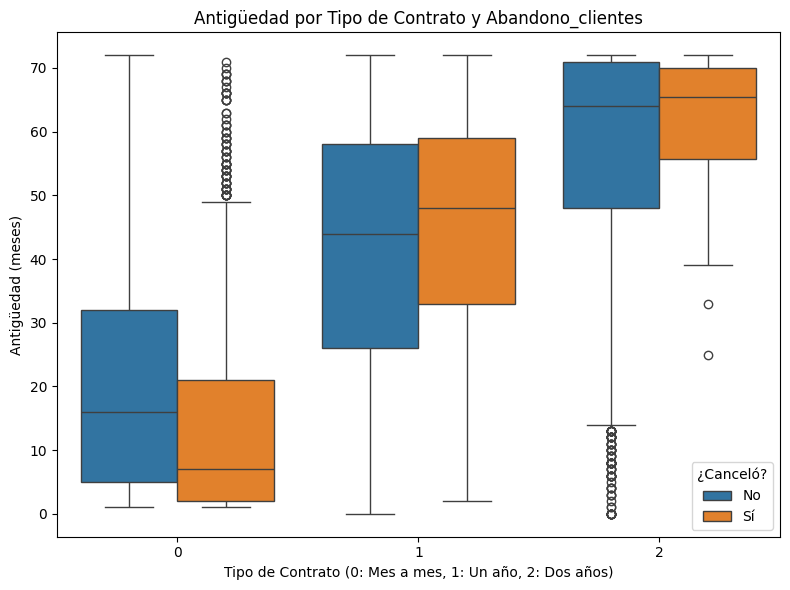

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datos_reducido['Abandono_cliente_label'] = datos_reducido['Abandono_cliente'].map({0: 'No', 1: 'Sí'})

plt.figure(figsize=(8, 6))
sns.boxplot(x='Tipo_de_contrato', y='Antiguedad_meses', hue='Abandono_cliente_label', data=datos_reducido)
plt.title('Antigüedad por Tipo de Contrato y Abandono_clientes')
plt.xlabel('Tipo de Contrato (0: Mes a mes, 1: Un año, 2: Dos años)')
plt.ylabel('Antigüedad (meses)')
plt.legend(title='¿Canceló?')
plt.tight_layout()
plt.show()

**GASTO DIARIO VS ABANDONO DEL CLIENTE**

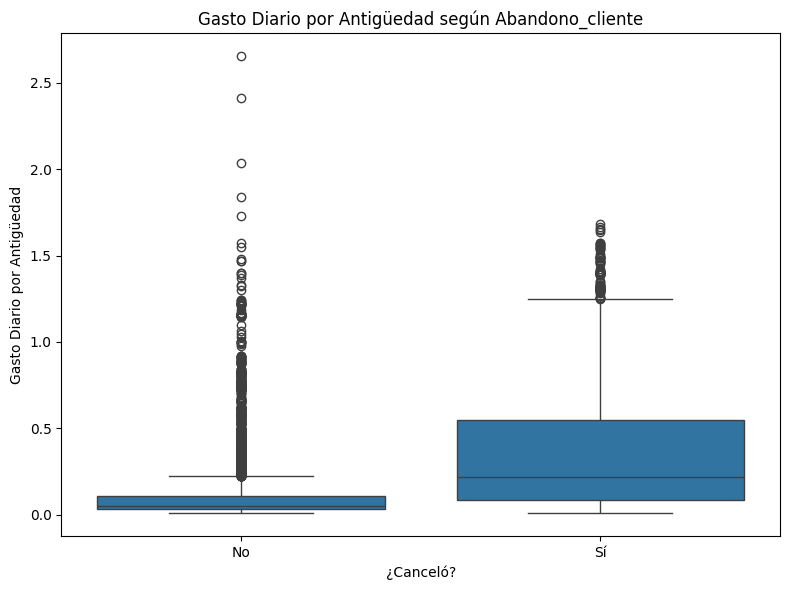

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Abandono_cliente_label', y='Gasto_diario_antiguedad', data=datos_reducido)
plt.title('Gasto Diario por Antigüedad según Abandono_cliente')
plt.xlabel('¿Canceló?')
plt.ylabel('Gasto Diario por Antigüedad')
plt.tight_layout()
plt.show()

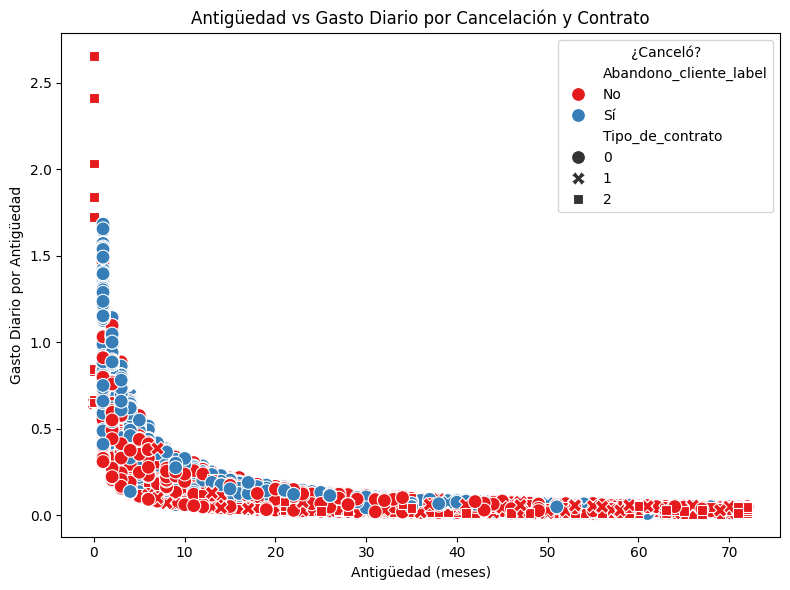

In [48]:

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=datos_reducido,
    x='Antiguedad_meses',
    y='Gasto_diario_antiguedad',
    hue='Abandono_cliente_label',
    style='Tipo_de_contrato',
    palette='Set1',
    s=100
)
plt.title('Antigüedad vs Gasto Diario por Cancelación y Contrato')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Gasto Diario por Antigüedad')
plt.legend(title='¿Canceló?')
plt.tight_layout()
plt.show()

Clientes con menor antigüedad tienden a tener más abandonos (azul más concentrado en valores bajos de antigüedad).

El gasto diario parece más alto en los clientes con menos antigüedad (en especial los que abandonan).

El tipo de contrato no muestra un patrón obvio de separación visual en relación a la cancelación (churn), pero es posible que tenga efecto que se puede analizar con modelos.

### **IMPORTANCIA DE LAS VARIABLES EN LA PREDICCION DEL ABANDONO DE CLIENTES**

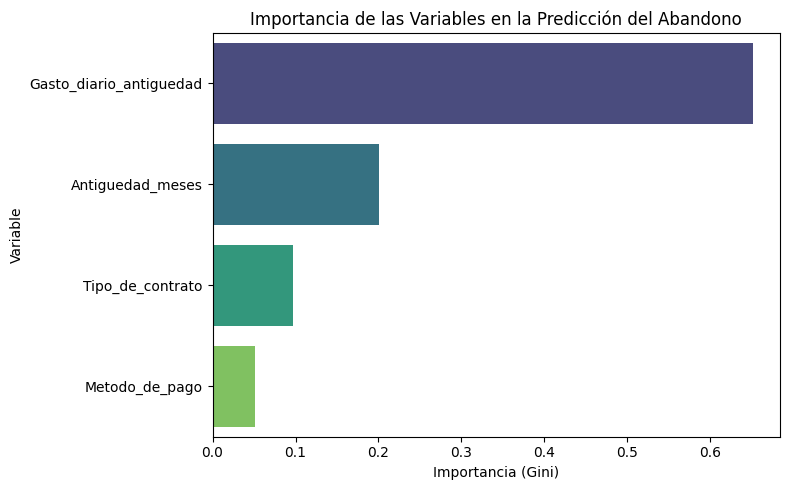

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = datos_reducido[['Antiguedad_meses', 'Tipo_de_contrato', 'Metodo_de_pago', 'Gasto_diario_antiguedad']]
y = datos_reducido['Abandono_cliente']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

importancias = modelo_rf.feature_importances_

importancia_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importancia_df, x='Importancia', y='Variable', palette='viridis')
plt.title('Importancia de las Variables en la Predicción del Abandono')
plt.xlabel('Importancia (Gini)')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

📊 **Importancia de las variables en el modelo Random Forest**

El gráfico muestra la importancia relativa de diferentes variables para predecir el abandono de clientes en un modelo basado en Random Forest.

**Gasto_diario_antiguedad** es la variable más importante, con una importancia aproximada de 0.65. Esto indica que tiene el mayor peso en la predicción del abandono de clientes.

**Antiguedad_meses** ocupa el segundo lugar en importancia, aunque con un valor considerablemente menor, alrededor de 0.20.

**Tipo_de_contrato y Metodo_de_pago** tienen menor relevancia en el modelo, con importancias cercanas a 0.10 y 0.05, respectivamente.

En resumen, el gasto diario en relación con la antigüedad del cliente es el factor más decisivo para predecir el abandono, superando ampliamente a las demás variables

### **CALCULO DEL ODDS RATIO**

El odds ratio es una medida estadística que se usa para comparar la probabilidad relativa de que ocurra un evento entre dos grupos diferentes.

El odds ratio compara los odds de dos grupos, por ejemplo, el grupo expuesto y el grupo no expuesto  a un factor.

                  Variable  Coeficiente  Odds_Ratio
3  Gasto_diario_antiguedad     2.079874    8.003464
2           Metodo_de_pago     0.026100    1.026443
0         Antiguedad_meses     0.002562    1.002565
1         Tipo_de_contrato    -1.385536    0.250190


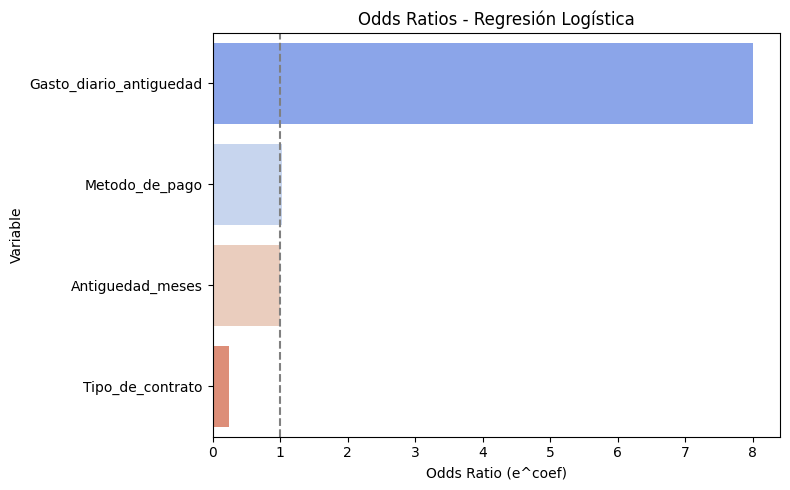

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = datos_reducido[['Antiguedad_meses', 'Tipo_de_contrato', 'Metodo_de_pago', 'Gasto_diario_antiguedad']]
y = datos_reducido['Abandono_cliente']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train, y_train)

coeficientes = modelo_log.coef_[0]
odds_ratios = np.exp(coeficientes)

logit_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': coeficientes,
    'Odds_Ratio': odds_ratios
}).sort_values(by='Odds_Ratio', ascending=False)

print(logit_df)

plt.figure(figsize=(8, 5))
sns.barplot(data=logit_df, x='Odds_Ratio', y='Variable', palette='coolwarm')
plt.axvline(x=1, color='gray', linestyle='--')
plt.title('Odds Ratios - Regresión Logística')
plt.xlabel('Odds Ratio (e^coef)')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

Este gráfico muestra el efecto de cada variable sobre la probabilidad de que un cliente abandone, medido mediante los odds ratios (e^coeficiente) de la regresión logística.

Odds Ratio = 1 → la variable no tiene efecto sobre la probabilidad de abandono.

Odds Ratio > 1 → aumenta la probabilidad de abandono.

Odds Ratio < 1 → disminuye la probabilidad de abandono.

Interpretación por variable:

**Gasto_diario_antiguedad (~8.2)**: Es la variable más influyente. Por cada unidad que aumenta el gasto diario (ajustado por antigüedad), la probabilidad de abandonar se multiplica por ~8.2.

**Conclusión:**
 Los clientes que gastan mucho por mes respecto a su antigüedad tienen mucha más probabilidad de cancelar.

**Metodo_de_pago (ligeramente > 1)**: Tiene un efecto positivo débil sobre el abandono.
Algunos métodos de pago podrían estar asociados con mayor cancelación, pero el efecto no es fuerte.

**Antiguedad_meses (ligeramente < 1)**:Tiene un efecto protector leve.
Cuanto mayor es la antigüedad, menor la probabilidad de abandono. Los clientes leales tienden a quedarse.

**Tipo_de_contrato (< 1)**: Tiene un efecto negativo fuerte, aunque menos que Gasto_diario_antiguedad. A mayor duración del contrato, menor probabilidad de abandono. Contratos anuales o bianuales protegen contra cancelaciones.

**Conclusión**

El **Gasto diario ajustado por antigüedad** es, por mucho, el mejor predictor de abandono. Le siguen, con efectos más débiles, el tipo de contrato y la antigüedad del cliente.

##**GUARDAR EL MODELO ENTRENADO**

In [52]:
import joblib

joblib.dump(pipe_rfopt, 'modelo_telecomX_abandono.pkl')

['modelo_telecomX_abandono.pkl']